# Schnyder's Algorithm

### Import de bibliothèque nécessaire à l'implémentation

In [1]:
import networkx as nx

### 1) Parser

Cette fonction a pour objectif de transformer un fichier texte en un graphe du module NetworkX.

Le programme prend un fichier texte en entrée de la forme :  
* 1ère ligne : $nbr\_vertex$ $nbr\_edge$  
* nbre_edge lignes suivantes : les edges sous la forme $x$ $y$ où $x$ et $y$ sont des sommets  

Le parser retournera un objet Graph du module networkx représentant le fichier texte.

In [2]:
def create_graph_from_file(filename):
    Graph = nx.Graph()
    
    #Ouverture du fichier texte
    with open(filename, 'r') as file:
        _, number_of_edges = map(int, file.readline().split())
        
        # Boucle sur les aretes pour les ajouter au graphe
        for _ in range(number_of_edges):
            edge = tuple(map(int, file.readline().split()))
            Graph.add_edge(*edge)
            
    return Graph

### 2) Recherche des faces du graphe

Cet algorithme a pour objectif de trouver toutes les faces d’un graphe.

Il prend en entrée :
* $graph$ un graphe du module NetworkX
* $neighbor\_dict$ un dictionnaire tel que pour chaque élément la clé est le sommet et la valeur une liste des sommets adjacents

Il retourne une liste contenant chaque face du graphe


In [3]:
def find_faces(graph, neighbor_dict):
    directed_edges = list(graph.to_directed().edges())
    face_list = []
    current_path = [directed_edges.pop(0)]

    #Tant qu'il y a des arcs non visites
    while directed_edges:
        x, y = current_path[-1]  # Dernier element du chemin
        neighbors = neighbor_dict[y]

        # Recuperation du prochain voisin
        z = neighbors[(neighbors.index(x) + 1) % len(neighbors)]
        edge = (y, z)

        if edge == current_path[0]:  # Si l'arc est deja dans la face
            face_list.append(current_path)
            current_path = [directed_edges.pop(0)]
        else:
            current_path.append(edge)
            edge_index = directed_edges.index(edge)
            directed_edges.pop(edge_index)

    # Ajout de la derniere face s'il en reste une
    if current_path:
        face_list.append(current_path)

    return face_list

### 3) Triangulation du graphe

L'algorithme **triangulate_graph** est l'algorithme principal permettant la transformation de notre graphe en un graphe triangulé.

Il prend en entrée :
* $graph$ Un graphe du module NetworkX
* $neighbor\_dict$ Un dictionnaire tel que pour chaque élément la clé est le sommet et la valeur une liste des sommets adjacents

Il retourne la liste des arêtes ayant été ajoutées au graphe.





L'algorithme **recur_faces** est un algorithme récursif permettant de trianguler les faces nouvellement triangulé de notre graphe jusqu'à n'obtenir que des faces triangulaires.

Il prend en entrée :
* $f$ Une face du graphe.

Il retourne la liste des arêtes ayant été ajoutées au graphe.





L'algorithme **add_edge_to_graph** est un algorithme permettant d'ajouter les arêtes au graphe.

Il prend en entrée :
* $graph$ Un graphe du module NetworkX
* $edge$ L'arête à ajouter
* $added\_edges$ La liste des arêtes déjà ajoutées.

Il retourne la liste des arêtes ayant été ajoutées au graphe.

In [4]:
def add_edge_to_graph(graph, edge, added_edges):
    #Verification si l arete est dans le graphe ou non
    if graph.number_of_edges(*edge) == 0:
        graph.add_edge(*edge)
        added_edges.append(edge)
    return added_edges

def recur_faces(f):
    
    if len(f) == 3: #si deja un triangle
        return []
    else:
        new_face = []
        size = len(f)
        count =  0
        new_edges=[]
        #Triangulation de la face a plus de trois sommets
        while count < size-1:
            new_edge = (f[count][0], f[count+1][1])
            if G.number_of_edges(new_edge[0], new_edge[1]) > 0:
                new_face.append(f[count])
                if count == size-2:
                    break
                count += 1
                continue
            G.add_edge(new_edge[0], new_edge[1])
            new_edges.append(new_edge)
            new_face.append(new_edge)
            count += 2
            
        if count != size:
            new_face.append(f[-1])
        #Triangulation de la face nouvellement creee
        new_recur = recur_faces(new_face)
    
        return new_edges + new_recur

def triangulate_graph(graph, neighbor_dict):
    # Check si les criteres de bases sont respectes
    if graph.number_of_nodes() < 3 or not nx.is_connected(graph):
        raise ValueError("The graph does not meet the criteria")
    
    added_edges = []
    #Cas où le graphe a trois sommets et deux aretes
    if graph.number_of_nodes() == 3 and graph.number_of_edges() == 2:
        edge = (1, 2) if graph.number_of_edges(0, 1) > 0 and graph.number_of_edges(0, 2) > 0 else \
               (0, 2) if graph.number_of_edges(1, 0) > 0 and graph.number_of_edges(1, 2) > 0 else \
               (0, 1)
        return add_edge_to_graph(graph, edge, added_edges)

    # Creation de la liste contenant les faces
    faces = find_faces(graph, neighbor_dict)
    
    #Triangulation face par face
    for face in faces:
        new_edges = recur_faces(face)
        if new_edges == []:
            continue
        else:
    
            for i in new_edges:
                added_edges.append(i)

    return added_edges

### 4) Labeling

L'algorithme **substract** permet de soustraire jusqu'à deux listes d'une autre liste.

Il prend en entrée :
* $l1$,$l2$,$l3$ 3 listes

La méthode retourne la liste des éléments de $l1$ non contenu dans $l2$ et $l3$

In [5]:
def subtract(l1, l2, l3 = []):
    return list(set(l1) - set(l2) - set(l3))

L'algorithme **schnyder_labeling** est l'algorithme principal servant à la labelisation des différents angles de notre graphe.

Il prend en entrée :
* $graph$ Un graphe du module NetworkX
* $neighbor\_dict$ Un dictionnaire tel que pour chaque élément la clé est le sommet et la valeur une liste des sommets adjacents
* $external\_face$ La face externe de notre graphe

L'algorithme retourne un tuple contenant un dictionnaire avec le labeling trié par sommet ainsi que la face externe de notre graphe.

In [6]:
def schnyder_labeling(graph, dico, external_face):
    
    
    v = sorted([external_face[0][0], external_face[1][0], external_face[2][0]])  #Trie les sommets de la face externe
    
    
    #Crée un dico avec les sommets
    dico_adj = {} 
    dico_v0 = dico[v[0]] #cree une liste contenant les voisins du premier sommet
    
    for i in range(len(list(graph.nodes()))): # nombre de noeuds
        dico_adj[i] = 0 #on initialise a 0 le dico pour chaque sommet 
    for i in dico_v0:
        #pour chaque sommet de dico_v0 ajoute la donnée au dico du nbre de sommet adjacent en commun avec dico_v0
        dico_adj[i] = len(list(set(dico_v0)& set(dico[i])))
    
    to_strip = []
    strip = []

    #on ajoute le(s) sommet(s) ayant 2 sommets adjacents en commun et n'appartenant pas à v
    for i in dico_v0:
        if i not in v and dico_adj[i] == 2:
            to_strip.append(i)
    
    
    #tant que le graphe compte au moins 3 sommets
    while graph.number_of_nodes() > 3:
    
        if len(to_strip) == 0:
            break
        
        u = to_strip.pop()
        dico_u = dico[u]
        
        
        #on ajoute a strip le sommet u, sa liste d'adjacence et les sommets adjacents à u mais pas à v0 + le sommet v0
        strip.append((u, dico_u, subtract(dico_u, dico_v0, [v[0]])))
        #on retire u du graphe et refait le graphe sans ce sommet
        graph.remove_node(u)
        #on recupere le nouveau dictionnaire de sommet adjacent sans u
        dico = nx.PlanarEmbedding.get_data(nx.check_planarity(graph)[1])
       
        # on retire u de ce_v0
        dico_v0 = subtract(dico_v0, [u])
        
        #Pour les sommets adjacents à u mais pas à v0 on cree un arc entre le sommet et v0
        for w in subtract(dico_u, dico_v0, [v[0]]):
            graph.add_edge(v[0], w)

        if graph.number_of_nodes() == 3:
            break
        #on ajoute à dico_v0 les sommets qui etaient adjacents à u mais pas v0
        dico_v0 += subtract(dico_u, [v[0]])
        dico_v0 = list(set(dico_v0))
        to_strip = []

        for w in dico[v[0]]:
            if len(list(set(dico_v0)& set(dico[w]))) == 2 and w not in v:
                to_strip.append(w)
            
    #il ne reste que les 3 sommets de base dans graph
    v = sorted(list(graph.nodes()))
    
    #on cree les labels pour les 3 sommets racines
    labels = {v[0]: {(v[1], v[2]): 0},v[1]: {(v[0], v[2]): 1},v[2]: {(v[0], v[1]): 2}}
    
    #on s'occupe des autres sommets
    while len(strip) > 0:
       
        u, new_dico, old_dico = strip.pop()
        #On depile les arcs si on a du en ajouter
        for w in old_dico:
            graph.remove_edge(v[0], w)

        if len(old_dico) == 0:
            w = sorted(new_dico)
            #on ajoute les labels pour le sommet u
            
            labels[u] = {(w[0], w[1]): labels[w[2]].pop((w[0], w[1])),
                         (w[0], w[2]): labels[w[1]].pop((w[0], w[2])),
                            (w[1], w[2]): labels[w[0]].pop((w[1], w[2]))}
            
            
            labels[w[0]][tuple(sorted([u, w[1]]))] = labels[u][(w[1], w[2])]
            labels[w[0]][tuple(sorted([u, w[2]]))] = labels[u][(w[1], w[2])]
            labels[w[1]][tuple(sorted([u, w[0]]))] = labels[u][(w[0], w[2])]
            labels[w[1]][tuple(sorted([u, w[2]]))] = labels[u][(w[0], w[2])]
            labels[w[2]][tuple(sorted([u, w[0]]))] = labels[u][(w[0], w[1])]
            labels[w[2]][tuple(sorted([u, w[1]]))] = labels[u][(w[0], w[1])]
        
        for w in new_dico:
            graph.add_edge(u, w)
    return labels, v

### TreeNode

La classe **TreeNode** représente les noeuds d'un arbre ainsi que diverses fonctions utiles si rapportant.

In [7]:
class TreeNode:
    def __init__(self, parent=None, child=None, label=None):
        self.parent = parent
        if child is not None:
            self.child = child 
        else:
            self.child = []
        self.label = label
        if parent is not None:
            self.depht = parent.depth +1
        else:
            self.depth = 1

    def add_child(self, children):
        if children not in self.child:
            self.child.append(children)
            children.parent = self
            children.update_depth(self.depth)

    def get_subtree_size(self):
        size = 1
        for children in self.child:
            size += children.get_subtree_size()
        return size

    def update_depth(self, depth):
        self.depth = depth + 1
        for children in self.child:
            children.update_depth(self.depth)

### 5) Realizer

L'algorithme **calculate_coords** permet le calcul des coordonnées des différents sommets du graphe.

Il prend en entrée :
* $graph$ Un graphe du module NetworkX.
* $tree\_node$ Un dictionnaire contenant le realisateur pour chaque noeud.
* $external\_face$ La face externe du graphe.

Il retourne un dictionnaire contenant chaque sommet et ses coordonnées

In [8]:
def calculate_coords(G, tree_nodes, external_face):
    # Trie et extrait les noeuds de l'arbre
    sorted_nodes = sorted(external_face)
    tree_nodes_arr = [tree_nodes[sorted_nodes[i]][i] for i in range(3)]

    # Initialise les coordonnées
    num_nodes = G.number_of_nodes()
    coordinates = {tree_nodes_arr[0].label: (num_nodes - 2, 1),
                   tree_nodes_arr[1].label: (0, num_nodes - 2),
                   tree_nodes_arr[2].label: (1, 0)}

    # Calcule les coordonnées pour chaque noeud
    for node in G.nodes():
        if node in [tr.label for tr in tree_nodes_arr]:
            continue

        n_values = [0, 0, 0]
        for i in range(3):
            # Parcourt les noeuds de l'arbre
            for tree_node in [(i + 1) % 3, (i - 1) % 3]:
                current_node = tree_nodes[node][tree_node]

                # Incrémente la valeur de n correspondante
                while current_node is not None:

                    n_values[i] += tree_nodes[current_node.label][i].get_subtree_size()
                    current_node = current_node.parent

            # Ajuste les valeurs de n

            n_values[i] -= tree_nodes[node][i].get_subtree_size()

            n_values[i] -= tree_nodes[node][(i - 1) % 3].depth


        # Met à jour les coordonnées
        coordinates[node] = (n_values[0], n_values[1])

    return coordinates


L'algorithme **realizer** permet de calculer le realiseur de notre graphe à l'aide de la labelisation trouvée précédemment.

Il prend en entrée:
* $graph$ Un graphe du module NetworkX.
* $schnyder\_labeling$ Le tuple contenant le labeling et la face externe obtenue lors de la précédente étape.

Il retourne le dictionnaire contenant les coordonnées des différents sommets du graphe.

Le réalisateur est un ensemble de trois arbres enracinés couvrant le graphe. Pour chaque sommet du graphe, cette fonction associe un triplet de noeuds d'arbre. Ces noeuds contiennent des informations sur la structure des arbres du réalisateur. La fonction utilise ces informations pour calculer les coordonnées de chaque sommet dans une représentation planaire du graphe.


In [9]:
def realizer(graph, schnyder_labeling):
    # Extrait les labels et la face externe venant du labeling de Schnyder
    labels, external_face = schnyder_labeling

    # Trie les sommets de la face externe
    sorted_external_face = sorted(external_face)

    # Crée un graphe dirigé pour représenter le réaliseur
    directed_graph = nx.DiGraph()
    
    #Crée un dictionnaire qui map chaque sommet du graphe originel 
    # comme un triplet de noeuds d'arbres, chacun labelisé avec le numéro du sommet.
    tree_nodes = {node: [TreeNode(label=node) for _ in range(3)] for node in graph.nodes()}
    # Itère sur chaque noeud du graphe d'origine
    for node in graph.nodes():
        #Crée une liste de liste contenant les sommets pour chaque label
        labeled_nodes = [[], [], []]
        
        #Ajoute les sommets à la liste appropriée par rapport au label
        for angle, label in labels[node].items():
            
            labeled_nodes[label].extend(list(angle))
        # Pour chaque label (0, 1, 2)
        for label, nodes_with_same_label in enumerate(labeled_nodes):
            # Trie les sommets par label
            nodes_with_same_label.sort()
            index = 0
            
            #Ajoute les arêtes au graphe dirigé pour les noeuds avec des labels identiques.
            while index < len(nodes_with_same_label) - 1:
                if nodes_with_same_label[index] == nodes_with_same_label[index+1]:
                    directed_graph.add_edge(nodes_with_same_label[index], node, label=label)
                    tree_nodes[node][label].add_child(tree_nodes[nodes_with_same_label[index]][label])
                    index += 1
                index += 1
    
    # Retourne les coordonnées calculées des différents sommets du graphe
    return calculate_coords(directed_graph, tree_nodes, sorted_external_face)


### Algorithme principal

Algorithme principal du projet permettant la visualisation d'un graphe planaire 3-connecté à l'aide de l'algorithme de Schnyder.

In [10]:
def schnyder(Graph):

    #verifie si le graphe est planaire et si oui le transforme en un dictionnaire
    #qui map tous les noeuds à une liste de voisins classés dans le sens horaire du graphe
    dico_graph = nx.PlanarEmbedding.get_data(nx.check_planarity(Graph)[1])
    
    # triangule le graph de tel sorte que chaque face soit un triangle et retourne une liste de face
    virt_edges = triangulate_graph(Graph, dico_graph) 

    G_tr = G.copy()
    
    #recree un dictionnaire avec le graphe maintenant triangule
    dico_graph = nx.PlanarEmbedding.get_data(nx.check_planarity(Graph)[1])

    #trouve toutes les faces du graphe triangule
    faces = find_faces(G, dico_graph)

    #Cree la labelisation du graphe
    lbl = schnyder_labeling(Graph, dico_graph, faces[0])

    #Cree le realisateur du graphe
    r = realizer(G_tr, lbl)

    return r

{0: (4, 1), 1: (0, 4), 2: (1, 0), 3: (1, 2), 4: (2, 1), 5: (1, 3)}


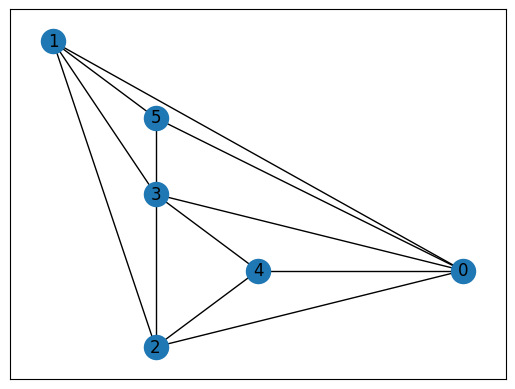

In [11]:
try:

    G = create_graph_from_file('input1.txt') #crée le graphe
    
    realizer = schnyder(G) #Methode principale
    print(realizer)
    nx.draw_networkx(G, realizer)
except:
    print('Error: Graph can\'t be drawn')